In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

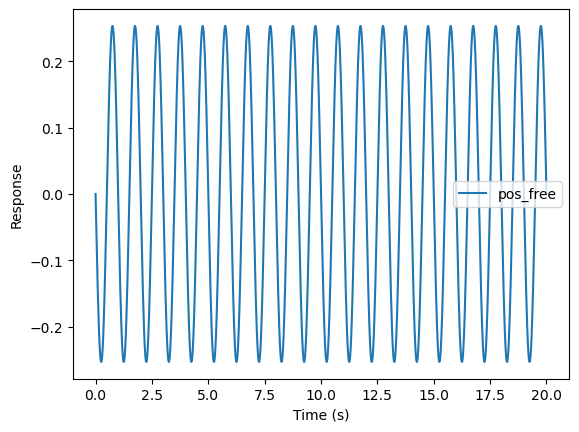

In [49]:
# Solve a mass spring damper system using the ODE solver
# y'' + 2*zeta*omega_n*y' + omega_n^2*y = f(t)
# y(0) = y0, y'(0) = y0_dot
# y = [y, y_dot]
# y' = [y_dot, y_dot_dot]
# y'' = [y_dot_dot, y_dot_dot_dot]
# y'' = -2*zeta*omega_n*y' - omega_n^2*y + f(t)


def bond_ode(zeta = 0.3, omega_n = 2*np.pi*100, gamma = 1E3, cap = 1E-1, V1= 10, V2 = 0, U1 = 1E-1, U2 = 0, omega_d = 2*np.pi*10):
    # Define the ODE system
    def mass_spring_damper_ode(y, t, zeta, omega_n, f):
        return [-2*zeta*omega_n*y[1] - omega_n**2*y[0] + f(t), y[1]]

    # Define the parameters for the ODE system
    Vi = lambda t: V1 * np.sin(omega_d*t) + V2 * np.cos(omega_d*t)
    f_free = lambda t:  -gamma*Vi(t)
    xt = lambda t: U1 * np.sin(omega_d*t) + U2 * np.cos(omega_d*t)
    f_clamped =  lambda t:  omega_n**2* xt(t)

    # Define the initial conditions
    y1 = [0.0, 0.0]
    y2 = [0.0, 0.0]

    # Define the time span
    t = np.linspace(0, 20, 1000000)
    # print(f_clamped(t))

    # Solve the ODE system
    y_clamped = sp.integrate.odeint(mass_spring_damper_ode, y1, t, args=(zeta, omega_n, f_clamped))
    y_free = sp.integrate.odeint(mass_spring_damper_ode, y2, t, args=(zeta, omega_n, f_free))
    # print(y_free)
    #
    Q_free = y_free[:, 0]*gamma + cap*Vi(t)
    Q_clamped = (y_clamped[:, 0]+xt(t)) *gamma + cap*Vi(t)
    
    return t, y_free, y_clamped, Q_free, Q_clamped, xt(t)

# Plot the results
Epoch = 1000
lr = 1E2
v1, v2 = 10, 0

# for _ in range(Epoch):
#     t, y_free, y_clamped, Q_free, Q_clamped, xt = bond_ode(V1=v1, V2=v2, U1=1E-1, U2=0, gamma=1E3, cap=1E-1, zeta=0.0001, omega_n=2*np.pi)
#     N = int(0.5*len(t))
#     Q_c = Q_clamped[N:]
#     Q_f = Q_free[N:]
#     T = t[N:]
#     # Sin and Cos terms 
#     xt_sin = np.sum(np.sin(2*np.pi*10*T) * xt[N:]) * 2 / N
#     xt_cos = np.sum(np.cos(2*np.pi*10*T) * xt[N:]) * 2 / N
#     # print(xt_sin, xt_cos)
#     # 
#     y_clamped_sin = np.sum(np.sin(2*np.pi*10*T) * y_clamped[N:, 0]) * 2 / N
#     y_clamped_cos = np.sum(np.cos(2*np.pi*10*T) * y_clamped[N:, 0]) * 2 / N
#     # print(y_clamped_sin, y_clamped_cos)
#     #
#     y_free_sin = np.sum(np.sin(2*np.pi*10*T) * y_free[N:, 0]) * 2 / N
#     y_free_cos = np.sum(np.cos(2*np.pi*10*T) * y_free[N:, 0]) * 2 / N
#     # print(y_free_sin, y_free_cos)
#     #
#     Q_c_sin = np.sum(np.sin(2*np.pi*10*T) * Q_c) * 2 / N
#     Q_c_cos = np.sum(np.cos(2*np.pi*10*T) * Q_c) * 2 / N
#     # print(Q_c_sin, Q_c_cos)
#     Q_f_sin = np.sum(np.sin(2*np.pi*10*T) * Q_f) * 2 / N
#     Q_f_cos = np.sum(np.cos(2*np.pi*10*T) * Q_f) * 2 / N
#     # print(Q_f_sin, Q_f_cos)
#     v1 = v1 - lr * (Q_c_sin - Q_f_sin)
#     v2 = v2 - lr * (Q_c_cos - Q_f_cos)
#     print(v1, v2)    

t, y_free, y_clamped, Q_free, Q_clamped, yt = bond_ode(V1=1, V2=0, U1=1E-1, U2=0, zeta=0.001, omega_n=2*np.pi*10, omega_d=2*np.pi*1)
plt.figure()
# plt.plot(t, y_clamped[:, 0], label='pos_clamped')
# plt.plot(t, yt, label='pos_target')
plt.plot(t, y_free[:, 0], label='pos_free')
# plt.plot(t, y[:, 1], label='vec')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.show()

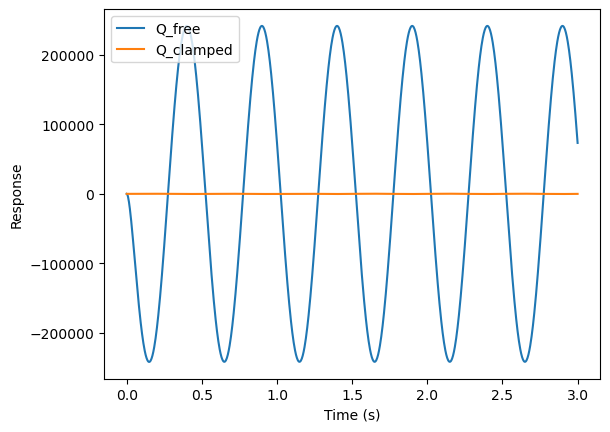

In [3]:
plt.figure()
plt.plot(t, Q_free, label='Q_free')
plt.plot(t, Q_clamped, label='Q_clamped')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()

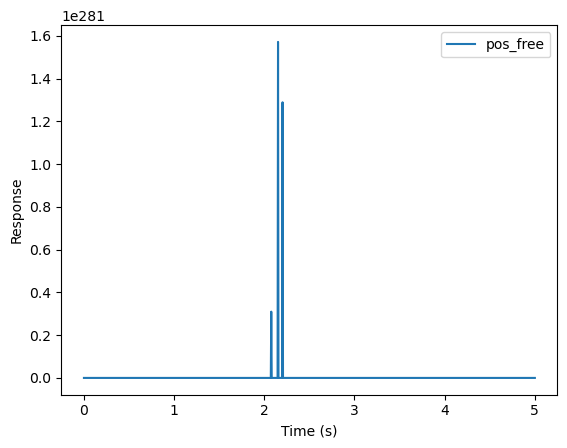

In [29]:
# Solve a mass spring damper system using the ODE solver
# y'' + 2*zeta*omega_n*y' + omega_n^2*y = f(t)
# y(0) = y0, y'(0) = y0_dot
# y = [y, y_dot]
# y' = [y_dot, y_dot_dot]
# y'' = [y_dot_dot, y_dot_dot_dot]
# y'' = -2*zeta*omega_n*y' - omega_n^2*y + f(t)


def bond_ode(zeta = 0.3, omega_n = 2*np.pi*100, gamma = 1E3, cap = 1E-1, V1= 10, V2 = 0, U1 = 1E-1, U2 = 0):
    # Define the ODE system
    def mass_spring_damper_ode(y, t, zeta, omega_n, f):
        return [y[1], -2*zeta*omega_n*y[1] - omega_n**2*y[0] + f(t)]

    # Define the parameters for the ODE system
    Vi = lambda t: V1 * np.sin(2*np.pi*1*t) + V2 * np.cos(2*np.pi*1*t)
    f_free = lambda t:  -gamma*Vi(t)
    xt = lambda t: U1 * np.sin(2*np.pi*1*t) + U2 * np.cos(2*np.pi*1*t)
    f_clamped =  lambda t:  omega_n**2* xt(t)

    # Define the initial conditions
    y1 = [0.001, 0.0]
    y2 = [0.001, 0.0]

    # Define the time span
    t = np.linspace(0, 5, 1000)
    # print(f_clamped(t))

    # Solve the ODE system
    y_clamped = sp.integrate.odeint(mass_spring_damper_ode, y1, t, args=(zeta, omega_n, f_clamped))
    y_free = sp.integrate.odeint(mass_spring_damper_ode, y2, t, args=(zeta, omega_n, f_free))
    # print(y_free)
    #
    Q_free = y_free[:, 0]*gamma + cap*Vi(t)
    Q_clamped = (y_clamped[:, 0]+xt(t)) *gamma + cap*Vi(t)
    
    return t, y_free, y_clamped, Q_free, Q_clamped, xt(t)

# Plot the results
Epoch = 1000
lr = 1E2
v1, v2 = 10, 0

t, y_free, y_clamped, Q_free, Q_clamped, yt = bond_ode(V1=1, V2=0, U1=1E-1, U2=0, zeta=0.001, omega_n=2*np.pi*1000)
plt.figure()
# plt.plot(t, y_clamped[:, 0], label='pos_clamped')
# plt.plot(t, yt, label='pos_target')
plt.plot(t, y_free[:, 0], label='pos_free')
# plt.plot(t, y[:, 1], label='vec')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.show()

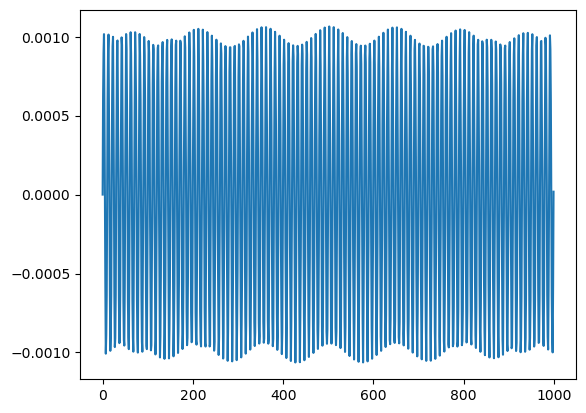

In [34]:
# python for mass spring damper

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def sig_mass_spring_damper(m, k, c):
    F = lambda t: 1E1 * np.sin(2*np.pi*10*t)
    dxdt = lambda x, t: [x[1], (F(t) - c*x[1] - k*x[0])/m]
    
    x = sp.integrate.odeint(dxdt, [0, 0], np.linspace(0, 10, 1000))
    return x

m, k, c, F = 1E-2, 1E4, 1E-4, 1E1
X = sig_mass_spring_damper(m, k, c)
plt.plot(X[:, 0])
plt.show()
 
    
    


